# Classifying Urban sounds using Deep Learning

## 1 Data Exploration and Visualisation

### UrbanSound dataset

For this project we will use a dataset called Urbansound8K. The dataset contains 8732 sound excerpts (<=4s) of urban sounds from 10 classes, which are:

- Air Conditioner
- Car Horn
- Children Playing
- Dog bark
- Drilling
- Engine Idling
- Gun Shot
- Jackhammer
- Siren
- Street Music

The accompanying metadata contains a unique ID for each sound excerpt along with it's given class name.

A sample of this dataset is included with the accompanying git repo and the full dataset can be downloaded from [here](https://urbansounddataset.weebly.com/urbansound8k.html).

### Audio sample file data overview

These sound excerpts are digital audio files in .wav format. 

Sound waves are digitised by sampling them at discrete intervals known as the sampling rate (typically 44.1kHz for CD quality audio meaning samples are taken 44,100 times per second). 

Each sample is the amplitude of the wave at a particular time interval, where the bit depth determines how detailed the sample will be also known as the dynamic range of the signal (typically 16bit which means a sample can range from 65,536 amplitude values). 

This can be represented with the following image: 
<img src="https://i.imgur.com/PJeiFdy.png">

Therefore, the data we will be analysing for each sound excerpts is essentially a one dimensional array or vector of amplitude values. 

### Analysing audio data 

For audio analysis, we will be using the following libraries: 

#### 1. IPython.display.Audio 

This allows us to play audio directly in the Jupyter Notebook. 

#### 2. Librosa 

librosa is a Python package for music and audio processing by Brian McFee and will allow us to load audio in our notebook as a numpy array for analysis and manipulation. 

You may need to install librosa using pip as follows: 

`pip install librosa` 

### Auditory inspection 

We will use `IPython.display.Audio` to play the audio files so we can inspect aurally. 

In [1]:
import IPython.display as ipd

ipd.Audio('./clinical/converted_seg/cneg/neg-0421-083-cough-m-53-8.wav')


### Visual inspection

We will load a sample from each class and visually inspect the data for any patterns. We will use librosa to load the audio file into an array then librosa.display and matplotlib to display the waveform. 

In [2]:
# Load imports

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

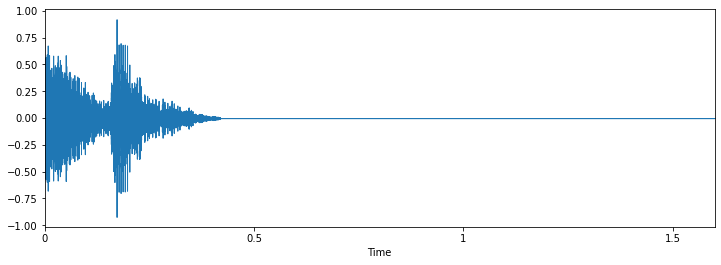

In [3]:
# Class: male negative

filename = './clinical/converted_seg/cneg/neg-0421-083-cough-m-53-8.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

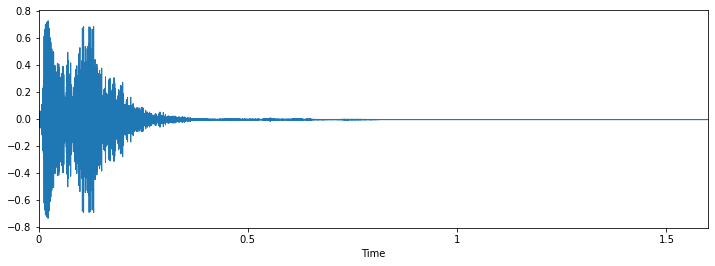

In [4]:
# Class: female negative

filename = './clinical/converted_seg/cneg/neg-0421-088-cough-f-66-8.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

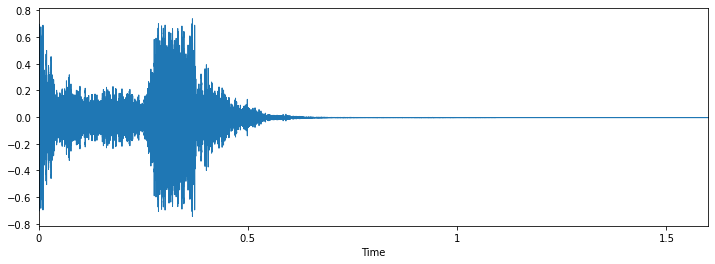

In [5]:
# Class:male positive 

filename = './clinical/converted_seg/cpos/pos-0421-084-cough-m-50-6.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

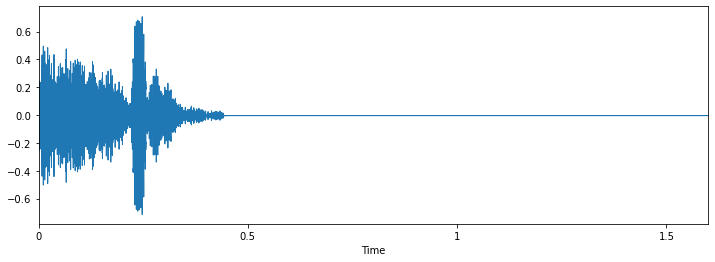

In [6]:
# Class:female positive 

filename = './clinical/converted_seg/cpos/pos-0421-087-cough-f-40-6.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)


In [7]:
# # Class: Children playing 

# filename = '../UrbanSound Dataset sample/audio/100263-2-0-117.wav'
# plt.figure(figsize=(12,4))
# data,sample_rate = librosa.load(filename)
# _ = librosa.display.waveplot(data,sr=sample_rate)
# ipd.Audio(filename)

In [8]:
# # Class: Dog bark

# filename = '../UrbanSound Dataset sample/audio/100032-3-0-0.wav'
# plt.figure(figsize=(12,4))
# data,sample_rate = librosa.load(filename)
# _ = librosa.display.waveplot(data,sr=sample_rate)
# ipd.Audio(filename)

In [9]:
# # Class: Drilling

# filename = '../UrbanSound Dataset sample/audio/103199-4-0-0.wav'
# plt.figure(figsize=(12,4))
# data,sample_rate = librosa.load(filename)
# _ = librosa.display.waveplot(data,sr=sample_rate)
# ipd.Audio(filename)

In [10]:
# # Class: Engine Idling 

# filename = '../UrbanSound Dataset sample/audio/102857-5-0-0.wav'
# plt.figure(figsize=(12,4))
# data,sample_rate = librosa.load(filename)
# _ = librosa.display.waveplot(data,sr=sample_rate)
# ipd.Audio(filename)

In [11]:
# # Class: Gunshot

# filename = '../UrbanSound Dataset sample/audio/102305-6-0-0.wav'
# plt.figure(figsize=(12,4))
# data,sample_rate = librosa.load(filename)
# _ = librosa.display.waveplot(data,sr=sample_rate)
# ipd.Audio(filename)

In [12]:
# # Class: Jackhammer

# filename = '../UrbanSound Dataset sample/audio/103074-7-0-0.wav'
# plt.figure(figsize=(12,4))
# data,sample_rate = librosa.load(filename)
# _ = librosa.display.waveplot(data,sr=sample_rate)
# ipd.Audio(filename)

In [13]:
# # Class: Siren

# filename = '../UrbanSound Dataset sample/audio/102853-8-0-0.wav'
# plt.figure(figsize=(12,4))
# data,sample_rate = librosa.load(filename)
# _ = librosa.display.waveplot(data,sr=sample_rate)
# ipd.Audio(filename)

In [14]:
# # Class: Street music

# filename = '../UrbanSound Dataset sample/audio/101848-9-0-0.wav'
# plt.figure(figsize=(12,4))
# data,sample_rate = librosa.load(filename)
# _ = librosa.display.waveplot(data,sr=sample_rate)
# ipd.Audio(filename)

### Observations 


From a visual inspection we can see that it is tricky to visualise the difference between some of the classes. 

Particularly, the waveforms for reptitive sounds for air conditioner, drilling, engine idling and jackhammer are similar in shape.  

Likewise the peak in the dog barking sample is simmilar in shape to the gun shot sample (albeit the samples differ in that there are two peaks for two gunshots compared to the one peak for one dog bark). Also, the car horn is similar too. 

There are also similarities between the children playing and street music. 

The human ear can naturally detect the difference between the harmonics, it will be interesting to see how well a deep learning model will be able to extract the necessary features to distinguish between these classes. 


However, it is easy to differentiate from the waveform shape, the difference between certain classes such as dog barking and jackhammer. 

### Dataset Metadata 

Here we will load the UrbanSound metadata .csv file into a Panda dataframe. 

In [15]:
import pandas as pd
metadata = pd.read_csv('./dataset_minor2.csv')
metadata.head()

,corona_test,cough_filename
0,negative,neg-0421-083-cough-m-53-0.wav
1,negative,neg-0421-083-cough-m-53-1.wav
2,negative,neg-0421-083-cough-m-53-10.wav
3,negative,neg-0421-083-cough-m-53-11.wav
4,negative,neg-0421-083-cough-m-53-12.wav


### Class distributions

In [16]:
print(metadata.corona_test.value_counts())

negative    73
positive    48
Name: corona_test, dtype: int64


### Observations 

Here we can see the Class labels are unbalanced. Although 7 out of the 10 classes all have exactly 1000 samples, and siren is not far off with 929, the remaining two (car_horn, gun_shot) have significantly less samples at 43% and 37% respectively. 

This will be a concern and something we may need to address later on. 

### Audio sample file properties

Next we will iterate through each of the audio sample files and extract, number of audio channels, sample rate and bit-depth. 

In [17]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display

from helpers.wavfilehelper import WavFileHelper
wavfilehelper = WavFileHelper()

audiodata = []
for index, row in metadata.iterrows():
    if row["corona_test"]=="negative":
        file_name = os.path.join(os.path.abspath('clinical/converted_seg/cneg'),str(row["cough_filename"]))
    else:
        file_name = os.path.join(os.path.abspath('clinical/converted_seg/cpos'),str(row["cough_filename"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])
audiodf

,num_channels,sample_rate,bit_depth
0,1,48000,16
1,1,48000,16
2,1,48000,16
3,1,48000,16
4,1,48000,16
...,...,...,...
116,1,48000,16
117,1,48000,16
118,1,48000,16
119,1,48000,16


### Audio channels 

Most of the samples have two audio channels (meaning stereo) with a few with just the one channel (mono). 

The easiest option here to make them uniform will be to merge the two channels in the stero samples into one by averaging the values of the two channels. 

In [18]:
# num of channels 

print(audiodf.num_channels.value_counts(normalize=True))

1    1.0
Name: num_channels, dtype: float64


### Sample rate 

There is a wide range of Sample rates that have been used across all the samples which is a concern (ranging from 96k to 8k).

This likley means that we will have to apply a sample-rate conversion technique (either up-conversion or down-conversion) so we can see an agnostic representation of their waveform which will allow us to do a fair comparison. 

In [19]:
# sample rates 

print(audiodf.sample_rate.value_counts(normalize=True))

48000    1.0
Name: sample_rate, dtype: float64


### Bit-depth 

There is also a wide range of bit-depths. It's likely that we may need to normalise them by taking the maximum and minimum amplitude values for a given bit-depth. 

In [20]:
# bit depth

print(audiodf.bit_depth.value_counts(normalize=True))

16    1.0
Name: bit_depth, dtype: float64


### Other audio properties to consider 

We may also need to consider normalising the volume levels (wave amplitude value) if this is seen to vary greatly, by either looking at the peak volume or the RMS volume. 

### *In the next notebook we will preprocess the data*

In [21]:
##convert mp3 to wav
# from pydub import AudioSegment
# for path, dirs ,files in os.walk("C:/Users/yajwi/OneDrive/Desktop/Udacity-ML-Capstone-master/Notebooks/clinical/segmented/neg"):
#     for entry in files:
#         if(entry != '.ipynb_checkpoints' and entry != '.wav'):
#             print(entry)
#             a = entry.split('.')
#             print(a[0] + '.wav')
#             src = entry
#             print('src:',src)
#             dst = 'C:/Users/yajwi/OneDrive/Desktop/Udacity-ML-Capstone-master/Notebooks/clinical/segmented/cneg/' + a[0] + '.wav'                                             
#             sound = AudioSegment.from_mp3(src)
#             sound.export(dst, format="wav")

In [22]:
# import os, csv
# import pandas as pd
# df = pd.DataFrame([], columns=['corona_test','cough_filename'])
# for path, dirs, files in os.walk("C:/Users/yajwi/OneDrive/Desktop/Udacity-ML-Capstone-master/Notebooks/clinical/converted_seg/neg"):
#     for filename in files:
#         print(filename)
#         df.loc[len(df.index)]=['negative',filename]
# df

In [23]:
# for path, dirs, files in os.walk("C:/Users/yajwi/OneDrive/Desktop/Udacity-ML-Capstone-master/Notebooks/clinical/converted_seg/pos"):
#     for filename in files:
#         print(filename)
#         df.loc[len(df.index)]=['positive',filename]
# df

In [24]:
# df.to_csv("dataset_minor2.csv", encoding='utf-8', index=False)